# about data

The original MNIST image dataset of handwritten digits is a popular benchmark for image-based machine learning methods but researchers have renewed efforts to update it and develop drop-in replacements that are more challenging for computer vision and original for real-world applications. As noted in one recent replacement called the Fashion-MNIST dataset, the Zalando researchers quoted the startling claim that "Most pairs of MNIST digits (784 total pixels per sample) can be distinguished pretty well by just one pixel". To stimulate the community to develop more drop-in replacements, the Sign Language MNIST is presented here and follows the same CSV format with labels and pixel values in single rows. The American Sign Language letter database of hand gestures represent a multi-class problem with 24 classes of letters (excluding J and Z which require motion).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy ,SparseCategoricalCrossentropy
from tensorflow import keras as k
from sklearn.model_selection import train_test_split
import tensorflow as tf

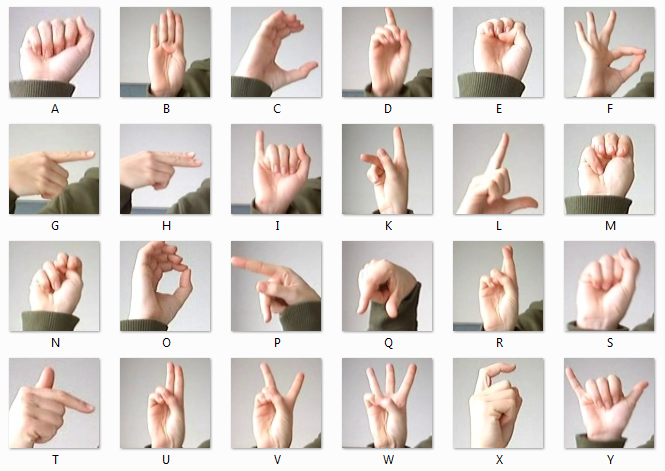

In [2]:
import matplotlib as mpl
from IPython.display import Image
Image("/kaggle/input/sign-language-mnist/amer_sign2.png")

In [3]:
data=pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv')
x_= data.drop(columns=['label'])
y_=data['label']
data=pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv')
x_test= data.iloc[:,1:]
y_test=data.iloc[:,0]

In [4]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


# check images

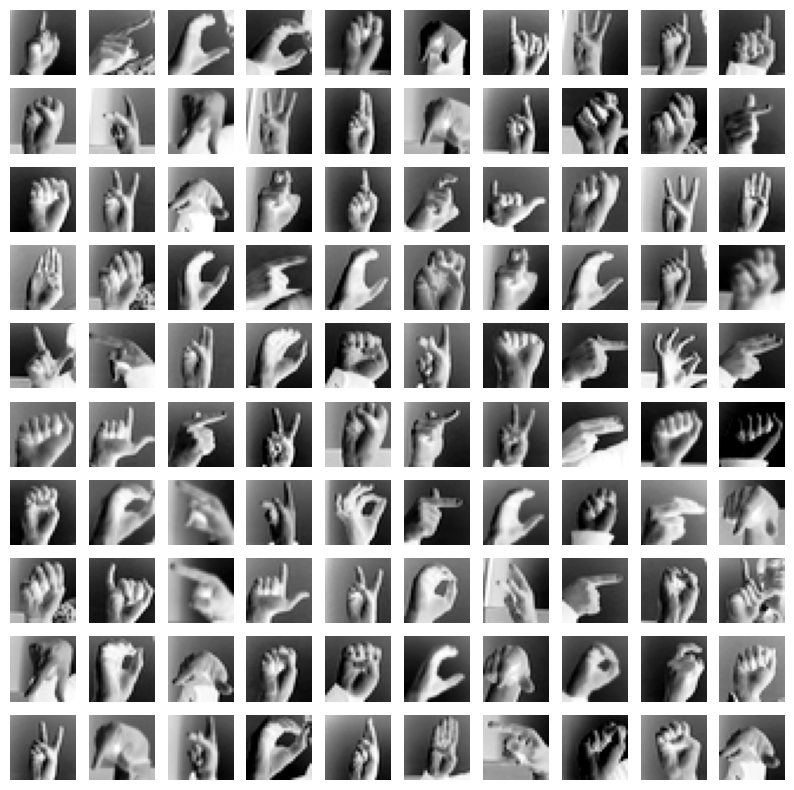

In [5]:
fig=plt.figure(figsize=(10, 10),dpi=100)
# Define row and cols in the figure
rows, cols = 10, 10
nm=list(plt.cm.datad.keys())
# Display first four images
i=0
for j in range(0, cols*rows):
  fig.add_subplot(rows, cols, j+1)
  plt.imshow(np.array(x_.iloc[i,:]).reshape(28,28),cmap='Greys')
  i+=1 
  plt.axis('off')

plt.show()

# Data exploration

<AxesSubplot:xlabel='label', ylabel='count'>

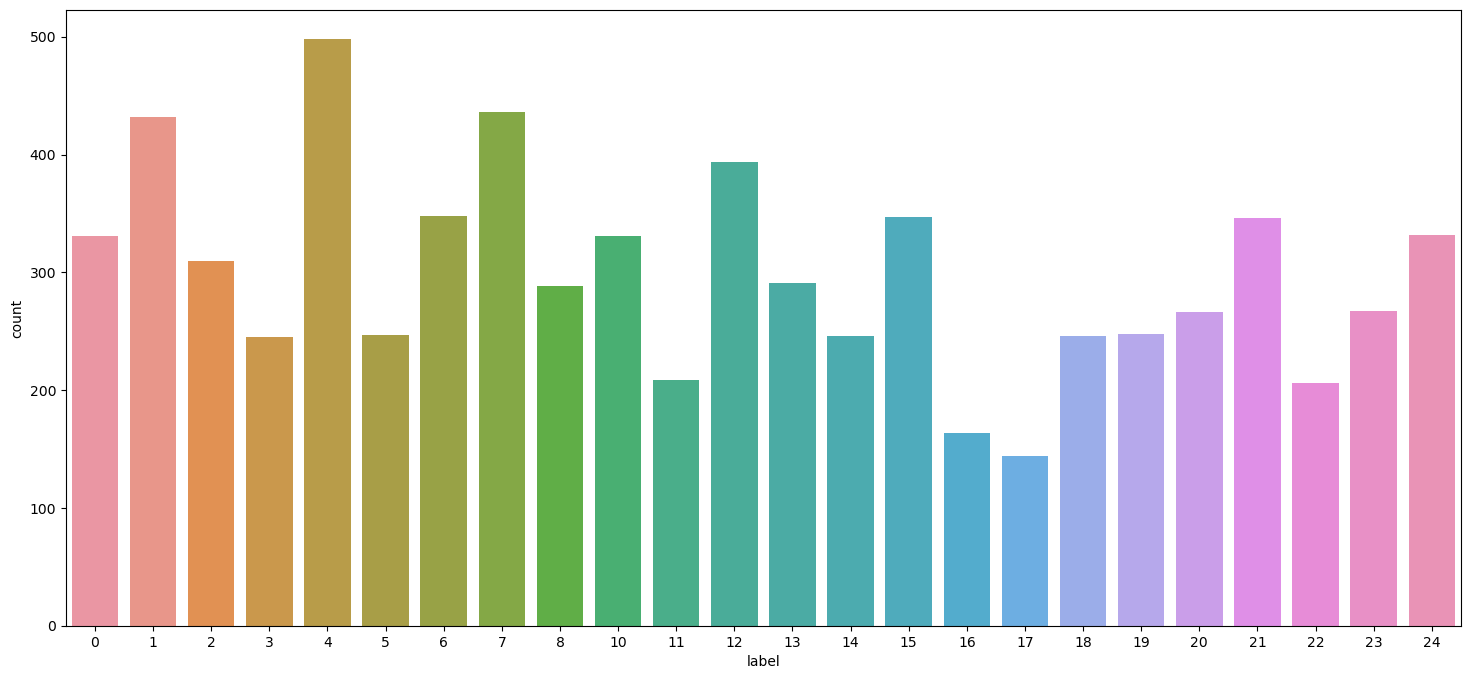

In [6]:
plt.figure(figsize = (18,8))
sns.countplot(x =data['label'])

In [7]:
model=Sequential([k.layers.Input(shape=(784,)),k.layers.BatchNormalization(),k.layers.Dropout(.3),k.layers.Dense(300,activation='elu',kernel_initializer='he_normal',),k.layers.BatchNormalization(),k.layers.Dropout(.3),k.layers.Dense(300,activation='elu',kernel_initializer='he_normal'),k.layers.BatchNormalization(),k.layers.Dropout(.3),k.layers.Dense(25,activation='softmax')])
model.compile(optimizer=k.optimizers.Adam(),loss=k.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 300)               9

In [8]:
k.backend.set_learning_phase(1)
hist=model.fit(x_,y_,epochs=1000,validation_split=.2, callbacks=[k.callbacks.EarlyStopping(patience=10,restore_best_weights=True)])

/opt/conda/lib/python3.7/site-packages/keras/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  "`tf.keras.backend.set_learning_phase` is deprecated and "


Epoch 1/1000


/opt/conda/lib/python3.7/site-packages/keras/backend.py:5586: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits, "Softmax", "sparse_categorical_crossentropy"


682/687 [============================>.] - ETA: 0s - loss: 1.2160 - accuracy: 0.6253

/opt/conda/lib/python3.7/site-packages/keras/backend.py:5586: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits, "Softmax", "sparse_categorical_crossentropy"


687/687 [==============================] - 7s 8ms/step - loss: 1.2120 - accuracy: 0.6263 - val_loss: 0.2273 - val_accuracy: 0.9439
Epoch 2/1000
687/687 [==============================] - 5s 8ms/step - loss: 0.5310 - accuracy: 0.8242 - val_loss: 0.0879 - val_accuracy: 0.9823
Epoch 3/1000
687/687 [==============================] - 5s 8ms/step - loss: 0.3629 - accuracy: 0.8766 - val_loss: 0.0394 - val_accuracy: 0.9934
Epoch 4/1000
687/687 [==============================] - 5s 7ms/step - loss: 0.2752 - accuracy: 0.9074 - val_loss: 0.0237 - val_accuracy: 0.9978
Epoch 5/1000
687/687 [==============================] - 6s 8ms/step - loss: 0.2174 - accuracy: 0.9288 - val_loss: 0.0158 - val_accuracy: 0.9973
Epoch 6/1000
687/687 [==============================] - 5s 8ms/step - loss: 0.2002 - accuracy: 0.9340 - val_loss: 0.0112 - val_accuracy: 0.9989
Epoch 7/1000
687/687 [==============================] - 6s 8ms/step - loss: 0.1801 - accuracy: 0.9406 - val_loss: 0.0075 - val_accuracy: 0.9987
Epoch

In [9]:
model.evaluate(x_test,y_test)

225/225 [==============================] - 1s 3ms/step - loss: 0.5171 - accuracy: 0.8741


[0.5171494483947754, 0.8740937113761902]

#  Visualize the result <a class="anchor" id="4"></a>

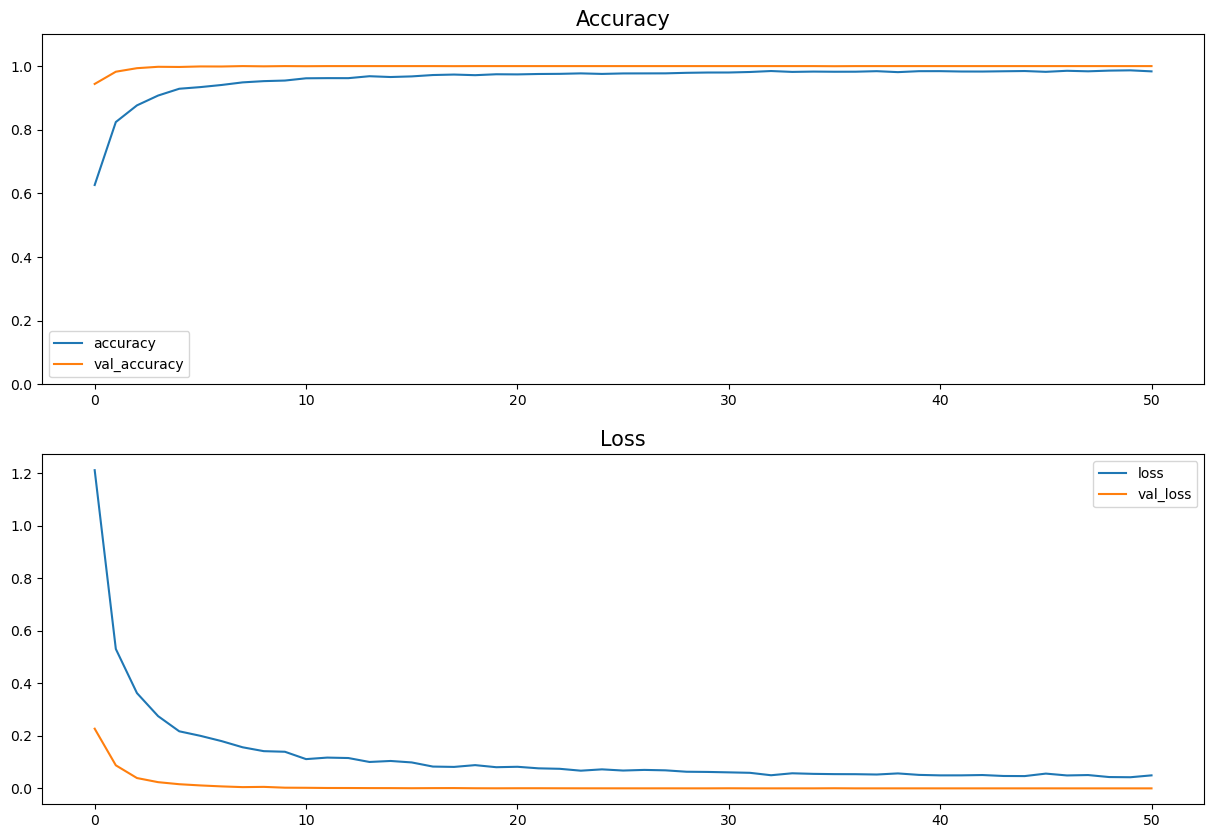

In [10]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
ax = axes.flat

pd.DataFrame(hist.history)[['accuracy','val_accuracy']].plot(ax=ax[0])
ax[0].set_title("Accuracy", fontsize = 15)
ax[0].set_ylim(0,1.1)

pd.DataFrame(hist.history)[['loss','val_loss']].plot(ax=ax[1])
ax[1].set_title("Loss", fontsize = 15)
plt.show()